In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  
from scipy import signal as sig

        X
0 -0.0290
1  0.0188
2  0.0186
3  0.0110
4  0.0038


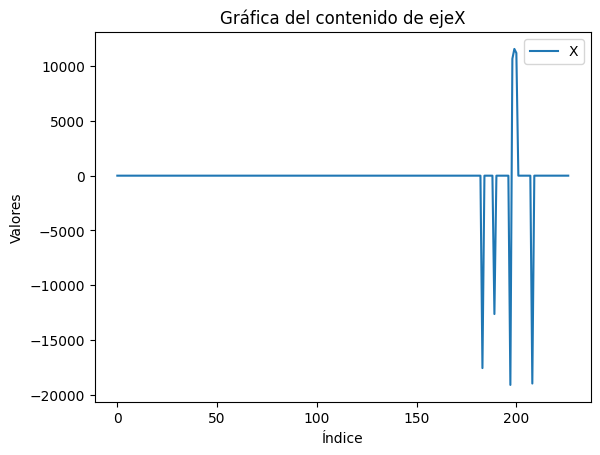

In [2]:
# Cargar el archivo Excel
X = pd.read_excel('ejeX.xlsx')

# Mostrar las primeras filas del DataFrame para verificar los datos
print(X.head())

# Graficar el contenido del archivo Excel
plt.figure()
for column in X.columns:
    plt.plot(X[column], label=column)

# Añadir etiquetas y título
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.title('Gráfica del contenido de ejeX')
plt.legend()
plt.show()

        Y
0  0.0121
1  0.0261
2  0.0131
3 -0.0022
4  3.0500


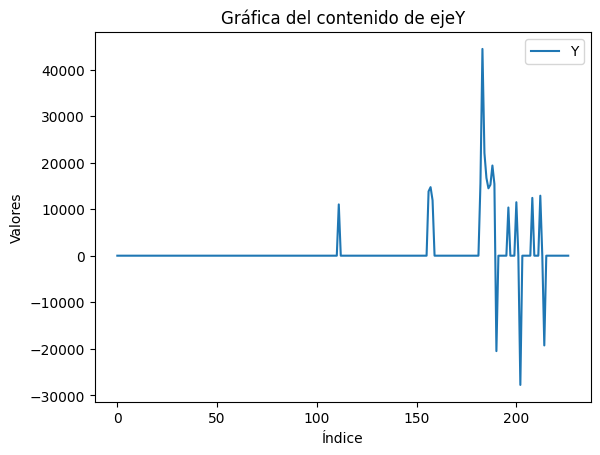

In [3]:
# Cargar el archivo Excel
Y = pd.read_excel('ejeY.xlsx')

# Mostrar las primeras filas del DataFrame para verificar los datos
print(Y.head())

# Graficar el contenido del archivo Excel
plt.figure()
for column in Y.columns:
    plt.plot(Y[column], label=column)

# Añadir etiquetas y título
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.title('Gráfica del contenido de ejeY')
plt.legend()
plt.show()

        Z
0 -0.0014
1  0.0225
2  0.0156
3  0.0034
4 -0.0031


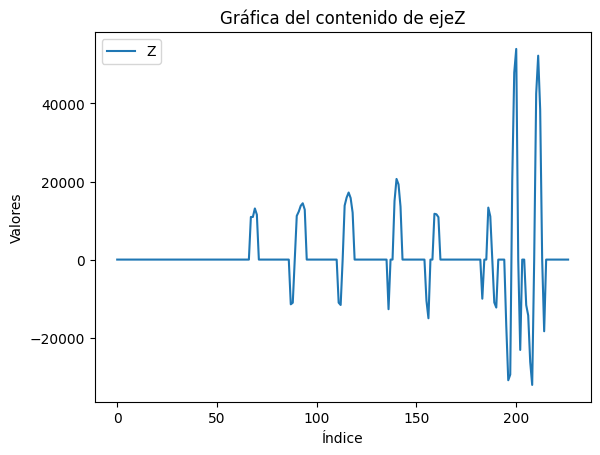

In [4]:
# Cargar el archivo Excel
Z = pd.read_excel('ejeZ.xlsx')

# Mostrar las primeras filas del DataFrame para verificar los datos
print(Z.head())

# Graficar el contenido del archivo Excel
plt.figure()
for column in Z.columns:
    plt.plot(Z[column], label=column)

# Añadir etiquetas y título
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.title('Gráfica del contenido de ejeZ')
plt.legend()
plt.show()

   angular_acceleration_X  angular_acceleration_Y  angular_acceleration_Z
0                  0.0718                 0.02750                 0.03930
1                  0.0238                 0.00050                 0.00850
2                 -0.0039                -0.01415                -0.00955
3                 -0.0074                 1.51845                -0.00935
4                  2.6695                -0.00105                -0.00390


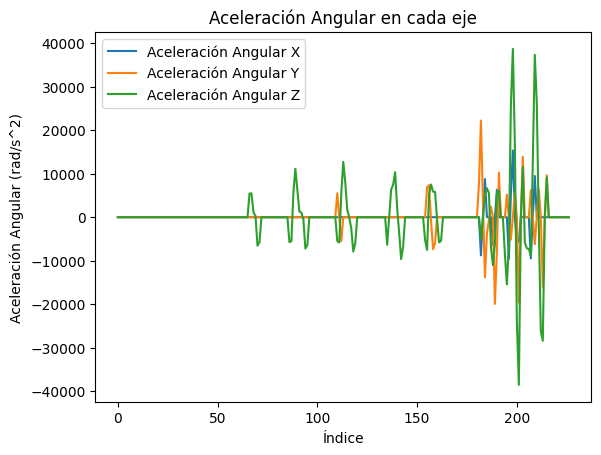

In [5]:
# Calcular la derivada de cada eje para obtener la aceleración angular
angular_acceleration_X = np.gradient(X['X'], edge_order=2)
angular_acceleration_Y = np.gradient(Y['Y'], edge_order=2)
angular_acceleration_Z = np.gradient(Z['Z'], edge_order=2)

# Crear un DataFrame con las aceleraciones angulares
angular_acceleration_df = pd.DataFrame({
    'angular_acceleration_X': angular_acceleration_X,
    'angular_acceleration_Y': angular_acceleration_Y,
    'angular_acceleration_Z': angular_acceleration_Z
})

# Mostrar las primeras filas del DataFrame para verificar los datos
print(angular_acceleration_df.head())

# Graficar las aceleraciones angulares
plt.figure()
plt.plot(angular_acceleration_df['angular_acceleration_X'], label='Aceleración Angular X')
plt.plot(angular_acceleration_df['angular_acceleration_Y'], label='Aceleración Angular Y')
plt.plot(angular_acceleration_df['angular_acceleration_Z'], label='Aceleración Angular Z')
plt.xlabel('Índice')
plt.ylabel('Aceleración Angular (rad/s^2)')
plt.title('Aceleración Angular en cada eje')
plt.legend()
plt.show()

0    0.086348
1    0.025277
2    0.017511
3    1.518497
4    2.669503
dtype: float64


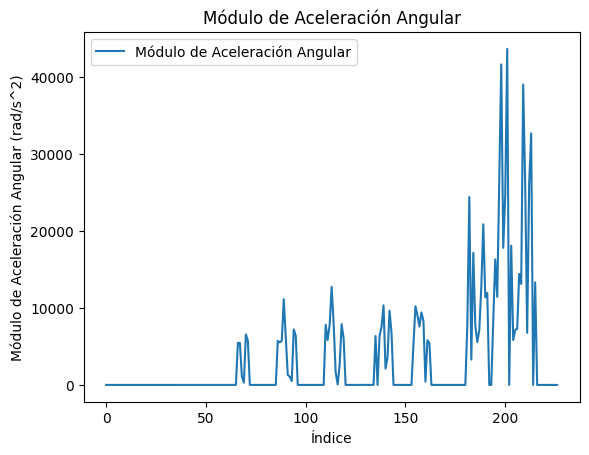

In [6]:
# Calcular el módulo de la aceleración angular
angular_acceleration_module = np.sqrt(angular_acceleration_df['angular_acceleration_X']**2 + 
                                      angular_acceleration_df['angular_acceleration_Y']**2 + 
                                      angular_acceleration_df['angular_acceleration_Z']**2)

# Mostrar las primeras filas del resultado para verificar los datos
print(angular_acceleration_module.head())

# Graficar el módulo de la aceleración angular
plt.figure()
plt.plot(angular_acceleration_module, label='Módulo de Aceleración Angular')
plt.xlabel('Índice')
plt.ylabel('Módulo de Aceleración Angular (rad/s^2)')
plt.title('Módulo de Aceleración Angular')
plt.legend()
plt.show()

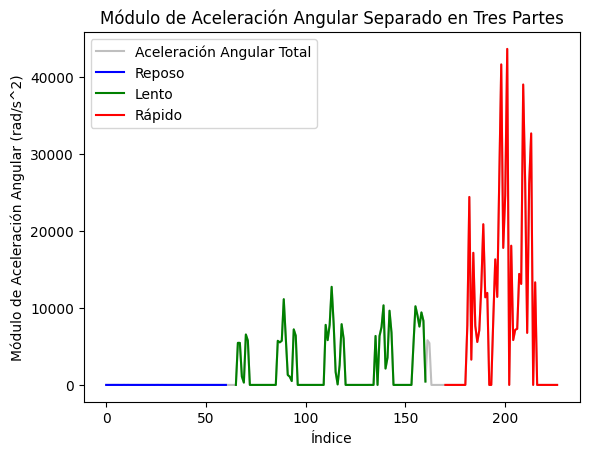

In [7]:
# Separar angular_acceleration_module en las tres partes
reposo = angular_acceleration_module.iloc[0:61]
lento = angular_acceleration_module.iloc[65:161]
rapido = angular_acceleration_module.iloc[170:251]

# Graficar las tres partes superpuestas a angular_acceleration_module
plt.figure()
plt.plot(angular_acceleration_module, label='Aceleración Angular Total', color='gray', alpha=0.5)
plt.plot(reposo, label='Reposo', color='blue')
plt.plot(lento, label='Lento', color='green')
plt.plot(rapido, label='Rápido', color='red')
plt.xlabel('Índice')
plt.ylabel('Módulo de Aceleración Angular (rad/s^2)')
plt.title('Módulo de Aceleración Angular Separado en Tres Partes')
plt.legend()
plt.show()

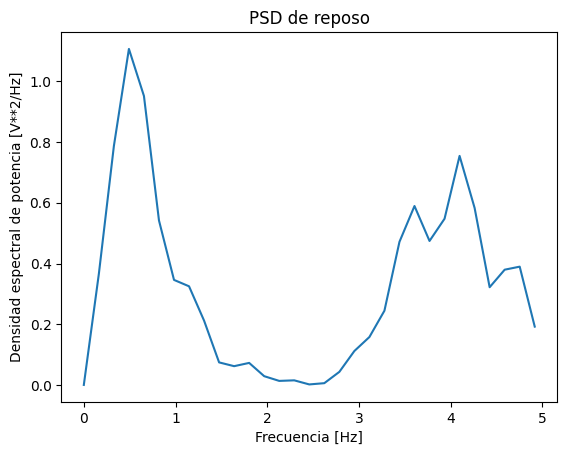

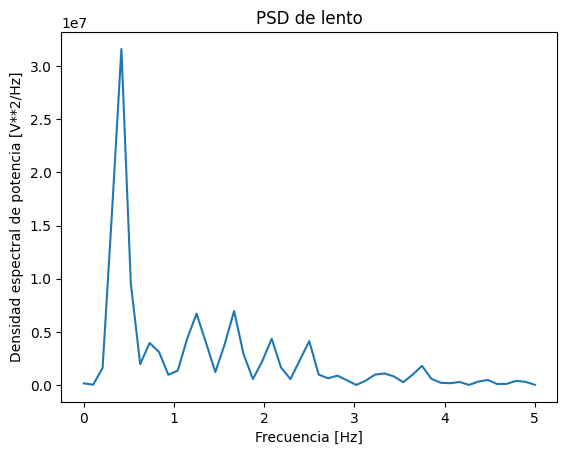

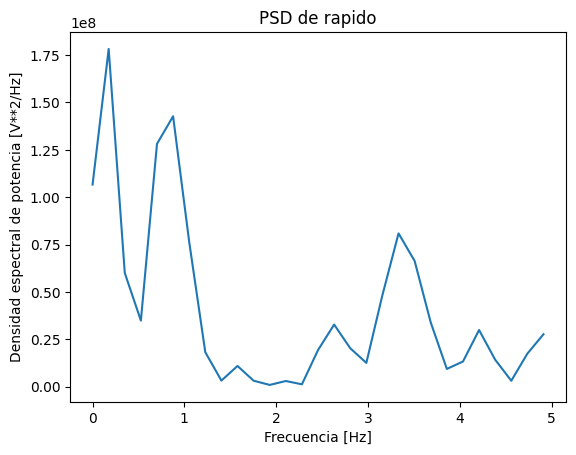

In [8]:
fs = 10

# Calcular la PSD de reposo utilizando el método de Welch
f_reposo, Pxx_den_reposo = sig.welch(reposo, fs, 'blackman', return_onesided=True, nperseg=len(reposo))

# Calcular la PSD de lento utilizando el método de Welch
f_lento, Pxx_den_lento = sig.welch(lento, fs, 'blackman', return_onesided=True, nperseg=len(lento))

# Calcular la PSD de rapido utilizando el método de Welch
f_rapido, Pxx_den_rapido = sig.welch(rapido, fs, 'blackman', return_onesided=True, nperseg=len(rapido))

# Graficar la PSD de reposo
plt.figure()
plt.plot(f_reposo, Pxx_den_reposo)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia [V**2/Hz]')
plt.title('PSD de reposo')
plt.show()

# Graficar la PSD de lento
plt.figure()
plt.plot(f_lento, Pxx_den_lento)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia [V**2/Hz]')
plt.title('PSD de lento')
plt.show()

# Graficar la PSD de rapido
plt.figure()
plt.plot(f_rapido, Pxx_den_rapido)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia [V**2/Hz]')
plt.title('PSD de rapido')
plt.show()

Conclusion: se puede ver que el movimiento rapido es un orden de magnitud mayor que el movimiento lento